# Exploratory Data Analysis of SuperStore
### By 
### Sk. Vaheed

In [1]:
install.packages("dplyr", repos='http://cran.us.r-project.org')
library("dplyr")
install.packages("ggplot2", repos='http://cran.us.r-project.org')
library("ggplot2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
store = read.csv("SampleSuperstore.csv",header=TRUE)
print(head(store))
summary(store)

       Ship.Mode   Segment       Country            City      State Postal.Code
1   Second Class  Consumer United States       Henderson   Kentucky       42420
2   Second Class  Consumer United States       Henderson   Kentucky       42420
3   Second Class Corporate United States     Los Angeles California       90036
4 Standard Class  Consumer United States Fort Lauderdale    Florida       33311
5 Standard Class  Consumer United States Fort Lauderdale    Florida       33311
6 Standard Class  Consumer United States     Los Angeles California       90032
  Region        Category Sub.Category    Sales Quantity Discount    Profit
1  South       Furniture    Bookcases 261.9600        2     0.00   41.9136
2  South       Furniture       Chairs 731.9400        3     0.00  219.5820
3   West Office Supplies       Labels  14.6200        2     0.00    6.8714
4  South       Furniture       Tables 957.5775        5     0.45 -383.0310
5  South Office Supplies      Storage  22.3680        2     0.20 

          Ship.Mode           Segment              Country    
 First Class   :1538   Consumer   :5191   United States:9994  
 Same Day      : 543   Corporate  :3020                       
 Second Class  :1945   Home Office:1783                       
 Standard Class:5968                                          
                                                              
                                                              
                                                              
            City               State       Postal.Code        Region    
 New York City: 915   California  :2001   Min.   : 1040   Central:2323  
 Los Angeles  : 747   New York    :1128   1st Qu.:23223   East   :2848  
 Philadelphia : 537   Texas       : 985   Median :56430   South  :1620  
 San Francisco: 510   Pennsylvania: 587   Mean   :55190   West   :3203  
 Seattle      : 428   Washington  : 506   3rd Qu.:90008                 
 Houston      : 377   Illinois    : 492   Max.   :99301   

#### Q1 : Selecting only Ship.Mode,Segment,Country,City these rows.

In [3]:
Q1 = select(store,Ship.Mode:City)
dim(Q1)
head(Q1)

[1] 9994    4

,Ship.Mode,Segment,Country,City
,<fct>,<fct>,<fct>,<fct>
1,Second Class,Consumer,United States,Henderson
2,Second Class,Consumer,United States,Henderson
3,Second Class,Corporate,United States,Los Angeles
4,Standard Class,Consumer,United States,Fort Lauderdale
5,Standard Class,Consumer,United States,Fort Lauderdale
6,Standard Class,Consumer,United States,Los Angeles


#### Q2 : Select rows which have Ship.Mode as Second class

In [4]:
Q2 = filter(select(store,c(Ship.Mode:City,Profit)),Ship.Mode=='Second Class')
dim(Q2)
head(Q2)

[1] 1945    5

,Ship.Mode,Segment,Country,City,Profit
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Second Class,Consumer,United States,Henderson,41.9136
2,Second Class,Consumer,United States,Henderson,219.5820
3,Second Class,Corporate,United States,Los Angeles,6.8714
4,Second Class,Consumer,United States,West Jordan,9.9900
5,Second Class,Consumer,United States,San Francisco,2.4824
6,Second Class,Consumer,United States,San Francisco,16.0110


#### Q3 : Select all Consumers from Los Angeles city

In [5]:
Q3 = filter(select(store,c(Ship.Mode:City,Profit)),City=='Los Angeles' & Segment=='Consumer')
dim(Q3)
head(Q3)

[1] 382   5

,Ship.Mode,Segment,Country,City,Profit
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Standard Class,Consumer,United States,Los Angeles,14.1694
2,Standard Class,Consumer,United States,Los Angeles,1.9656
3,Standard Class,Consumer,United States,Los Angeles,90.7152
4,Standard Class,Consumer,United States,Los Angeles,5.7825
5,Standard Class,Consumer,United States,Los Angeles,34.4700
6,Standard Class,Consumer,United States,Los Angeles,85.3092


#### Q4 : Select all Consumers from Los Angeled and arrange them in descending order of Profit

In [6]:
Q4 = arrange(filter(select(store,c(Ship.Mode:City,Profit)),Ship.Mode=='Second Class'&Segment=='Consumer'),desc(Profit))
dim(Q4)
head(Q4)

[1] 1020    5

,Ship.Mode,Segment,Country,City,Profit
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Second Class,Consumer,United States,Arlington,2799.9840
2,Second Class,Consumer,United States,Jackson,2504.2216
3,Second Class,Consumer,United States,Los Angeles,944.9865
4,Second Class,Consumer,United States,Morristown,735.0336
5,Second Class,Consumer,United States,Des Moines,701.9883
6,Second Class,Consumer,United States,Richmond,629.9910


#### Q5 : Find maximum profit in all cities

In [7]:
Q5 =store%>%select(City,Profit)%>%group_by(City)%>%summarise(Max_Profit=max(Profit))
print(Q5)

# A tibble: 531 x 2
   City        Max_Profit
   <fct>            <dbl>
 1 Aberdeen          6.63
 2 Abilene          -3.76
 3 Akron            66.5 
 4 Albuquerque     138.  
 5 Alexandria       83.3 
 6 Allen             5.38
 7 Allentown        15.5 
 8 Altoona           2.20
 9 Amarillo         42.9 
10 Anaheim         311.  
# … with 521 more rows


#### Q6 : Find total profit in every city

In [8]:
Q6 =store%>%select(City,Profit)%>%group_by(City)%>%summarise(Total.Profit=sum(Profit))%>%arrange(desc(Total.Profit))
print(Q6)

# A tibble: 531 x 2
   City          Total.Profit
   <fct>                <dbl>
 1 New York City       62037.
 2 Los Angeles         30441.
 3 Seattle             29156.
 4 San Francisco       17507.
 5 Detroit             13182.
 6 Lafayette           10018.
 7 Jackson              7582.
 8 Atlanta              6994.
 9 Minneapolis          6825.
10 San Diego            6377.
# … with 521 more rows


#### Q7 : Find total sales in each region

In [9]:
Q7 =store%>%select(Region,Sales)%>%group_by(Region)%>%summarise(Total.Sales=sum(Sales))%>%arrange(desc(Total.Sales))
print(Q7)

# A tibble: 4 x 2
  Region  Total.Sales
  <fct>         <dbl>
1 West        725458.
2 East        678781.
3 Central     501240.
4 South       391722.


# univaration Plots

#### Plot count of each category in Ship.Mode

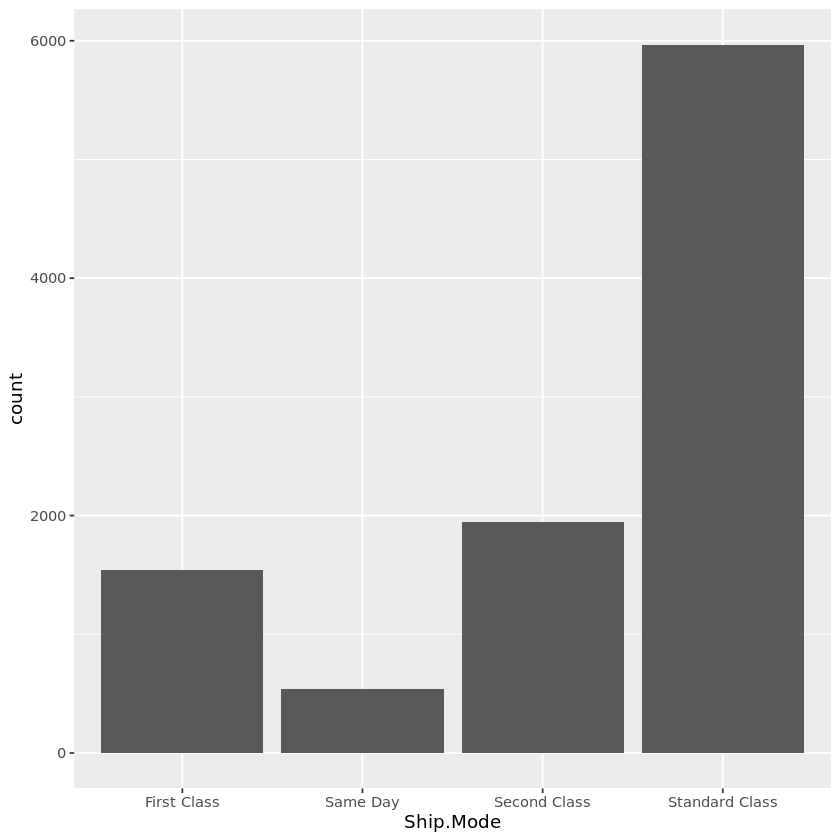

In [10]:
ggplot(data = store) + 
  geom_bar(mapping = aes(x = Ship.Mode,group = 1))

#### Plot count of each category in region

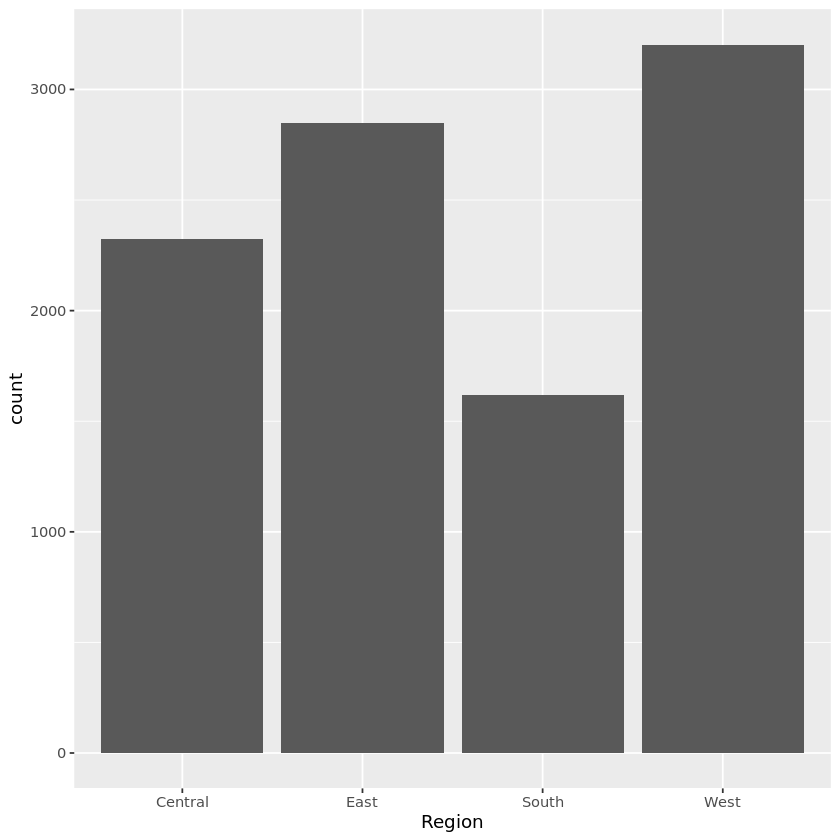

In [11]:
ggplot(data = store) + 
  geom_bar(mapping = aes(x = Region,group = 1))

#### Find outliers using box plot

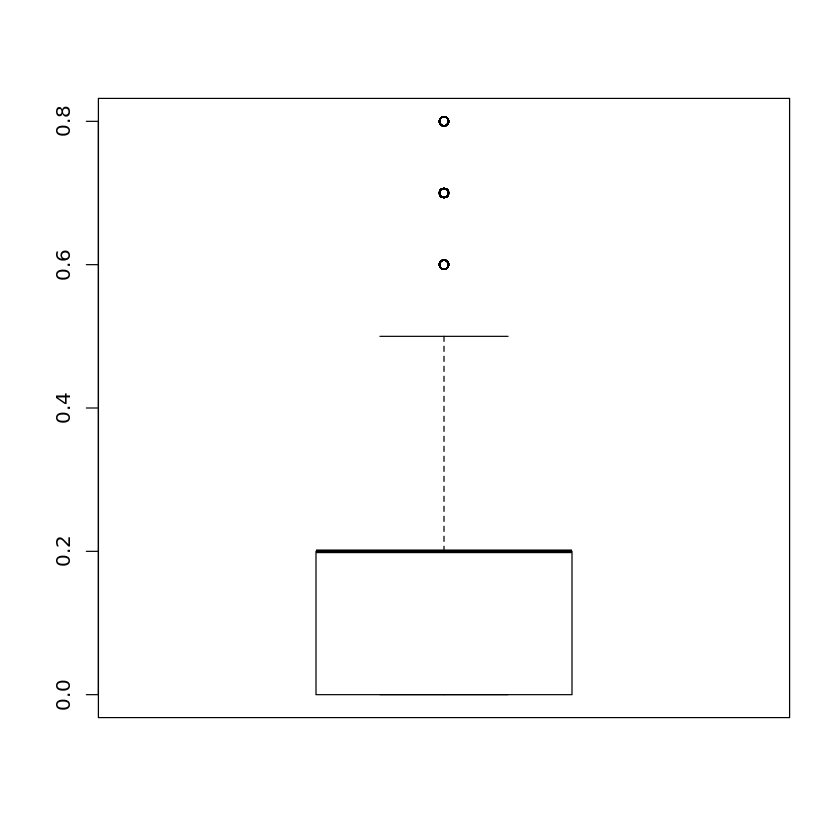

In [12]:
boxplot(store$Discount)

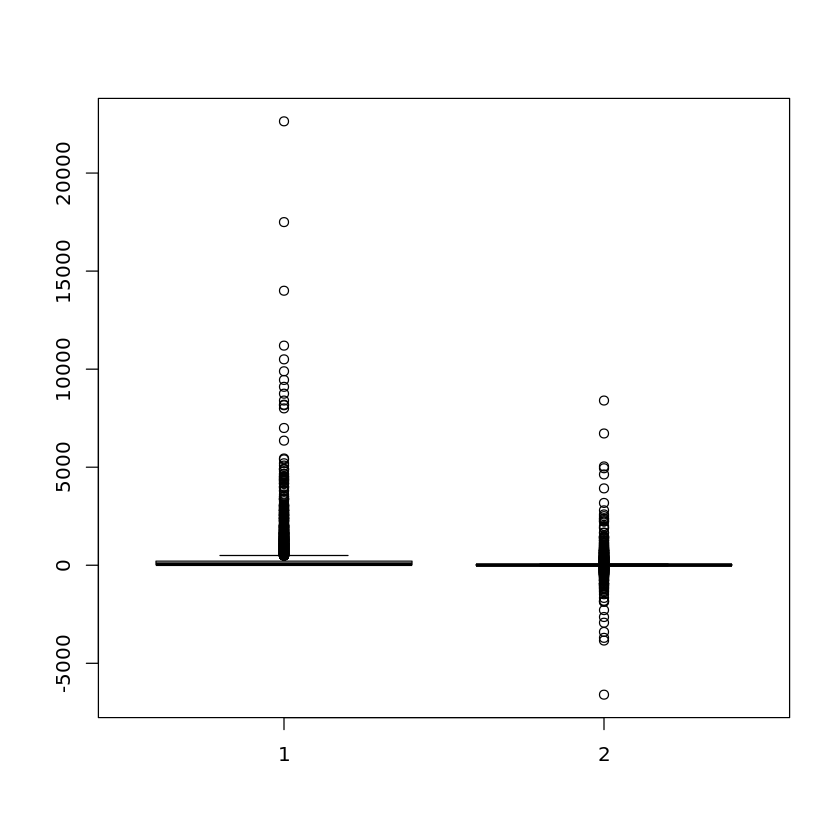

In [13]:
boxplot(store$Sales,store$Profit)

# Bivariation Plots
#### Box plot between Ship.Mode and Profit

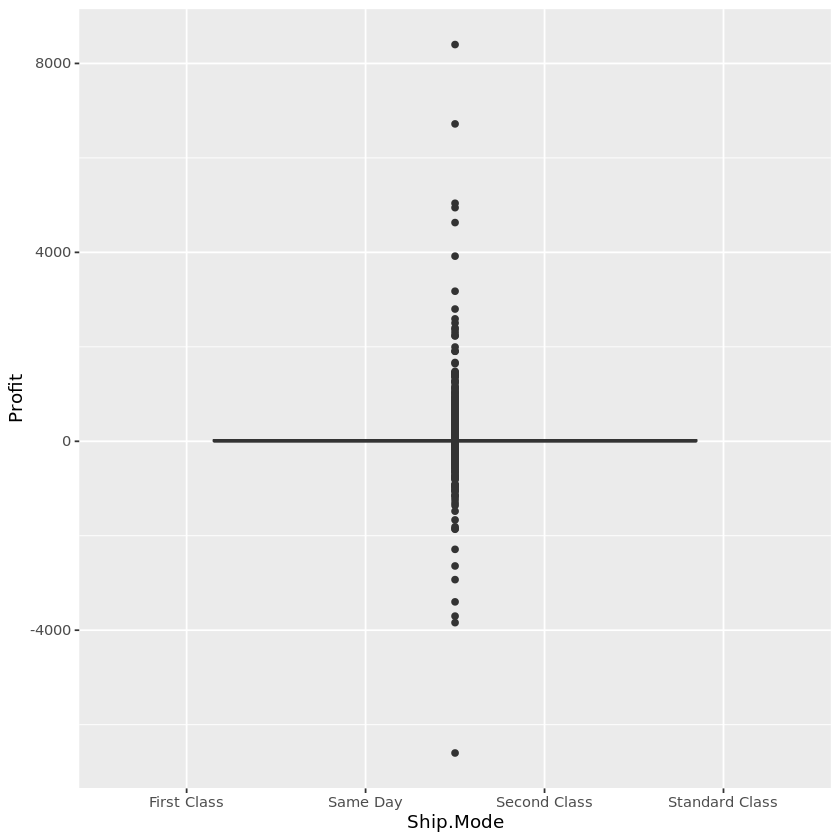

In [14]:
ggplot(data = store, mapping = aes(x =Ship.Mode, y = Profit,group=1)) + 
  geom_boxplot()

#### Box plot between State and Profit

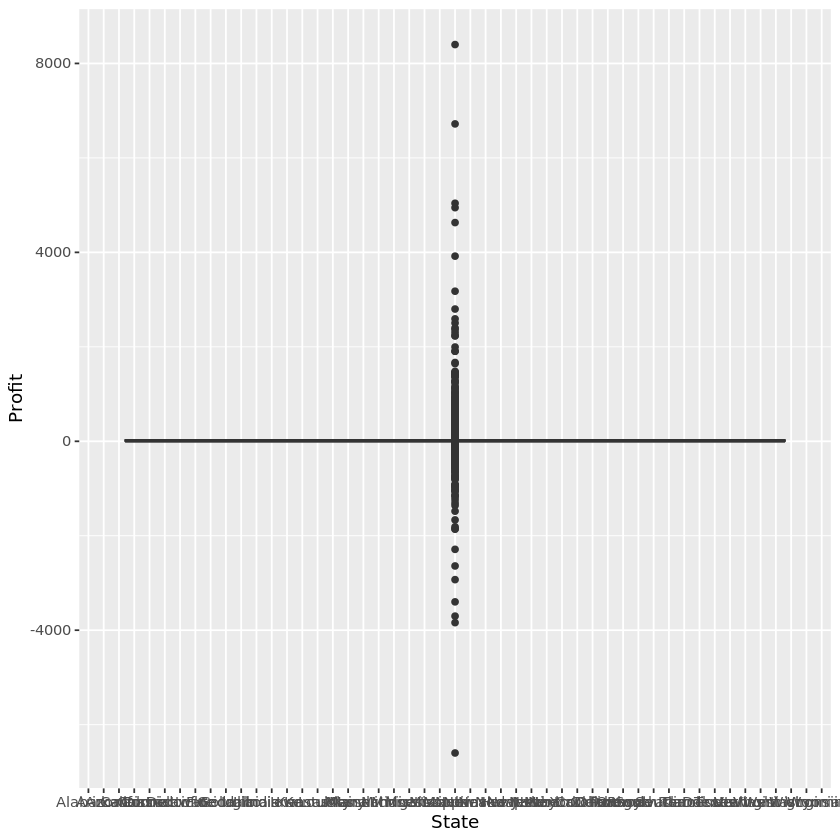

In [15]:
ggplot(data = store, mapping = aes(x =State, y = Profit,group=1)) + 
  geom_boxplot()

#### Find and plot maximum profit in each city

# A tibble: 49 x 2
   State                  Max
   <fct>                <dbl>
 1 Alabama              1459.
 2 Arizona               211.
 3 Arkansas              843.
 4 California           1906.
 5 Colorado              248.
 6 Connecticut           295.
 7 Delaware             5040.
 8 District of Columbia  649.
 9 Florida               328.
10 Georgia              3177.
# … with 39 more rows


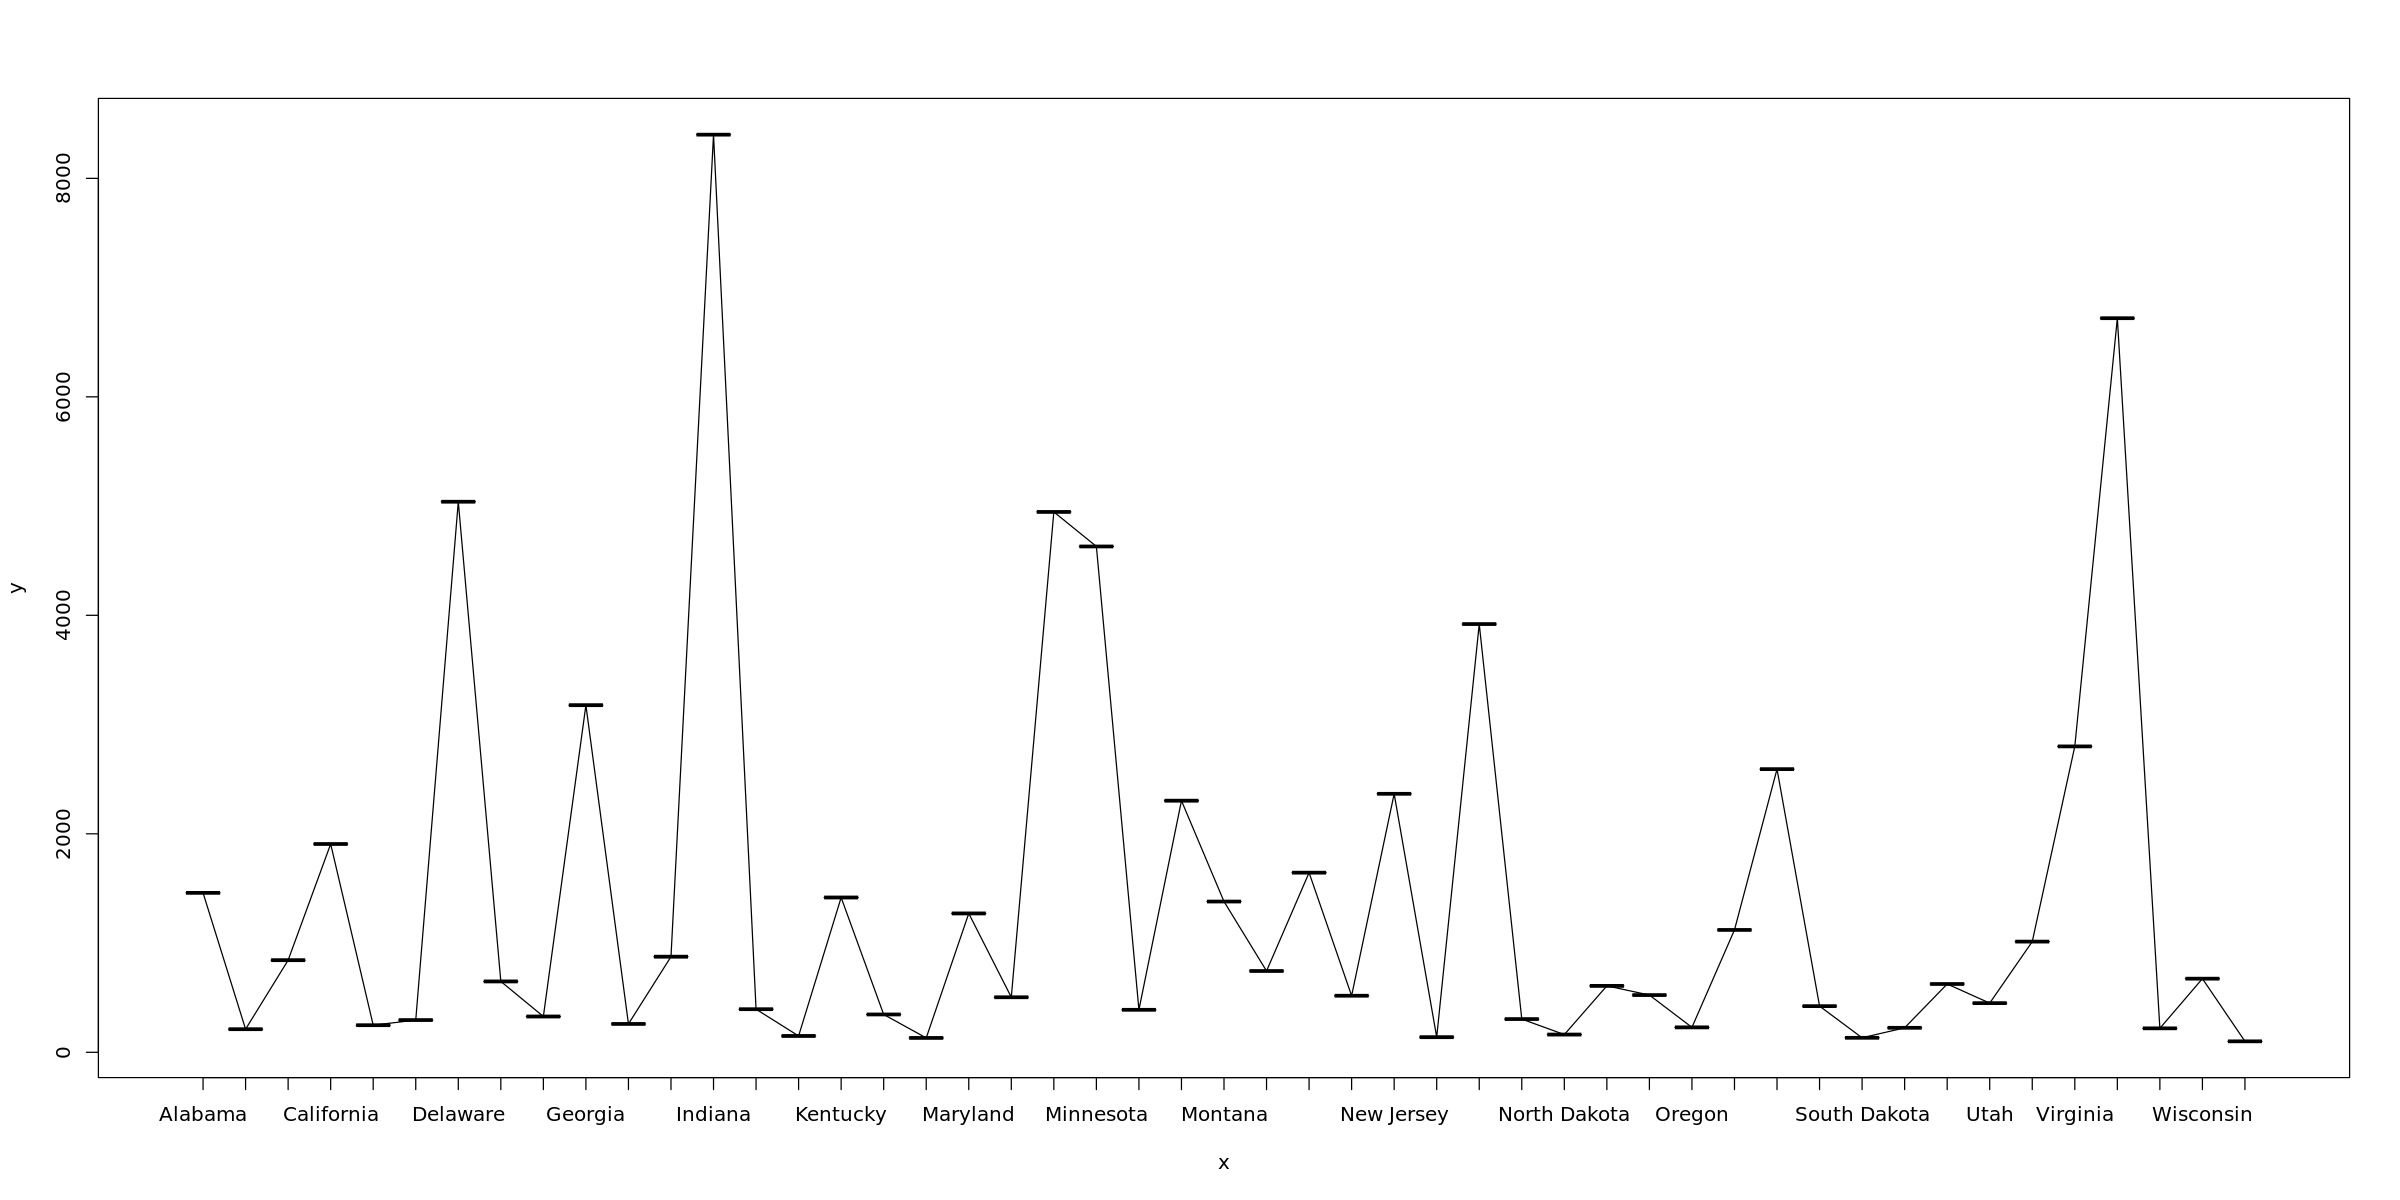

In [16]:
Q10 = select(store,State,Profit)%>%group_by(State)%>%summarise(Max = max(Profit))
print(Q10)
options(repr.plot.width = 20, repr.plot.height = 10)
plot(x=Q10$State,y=Q10$Max)
lines(x=Q10$State,y=Q10$Max)

#### Find and plot total sales in each city

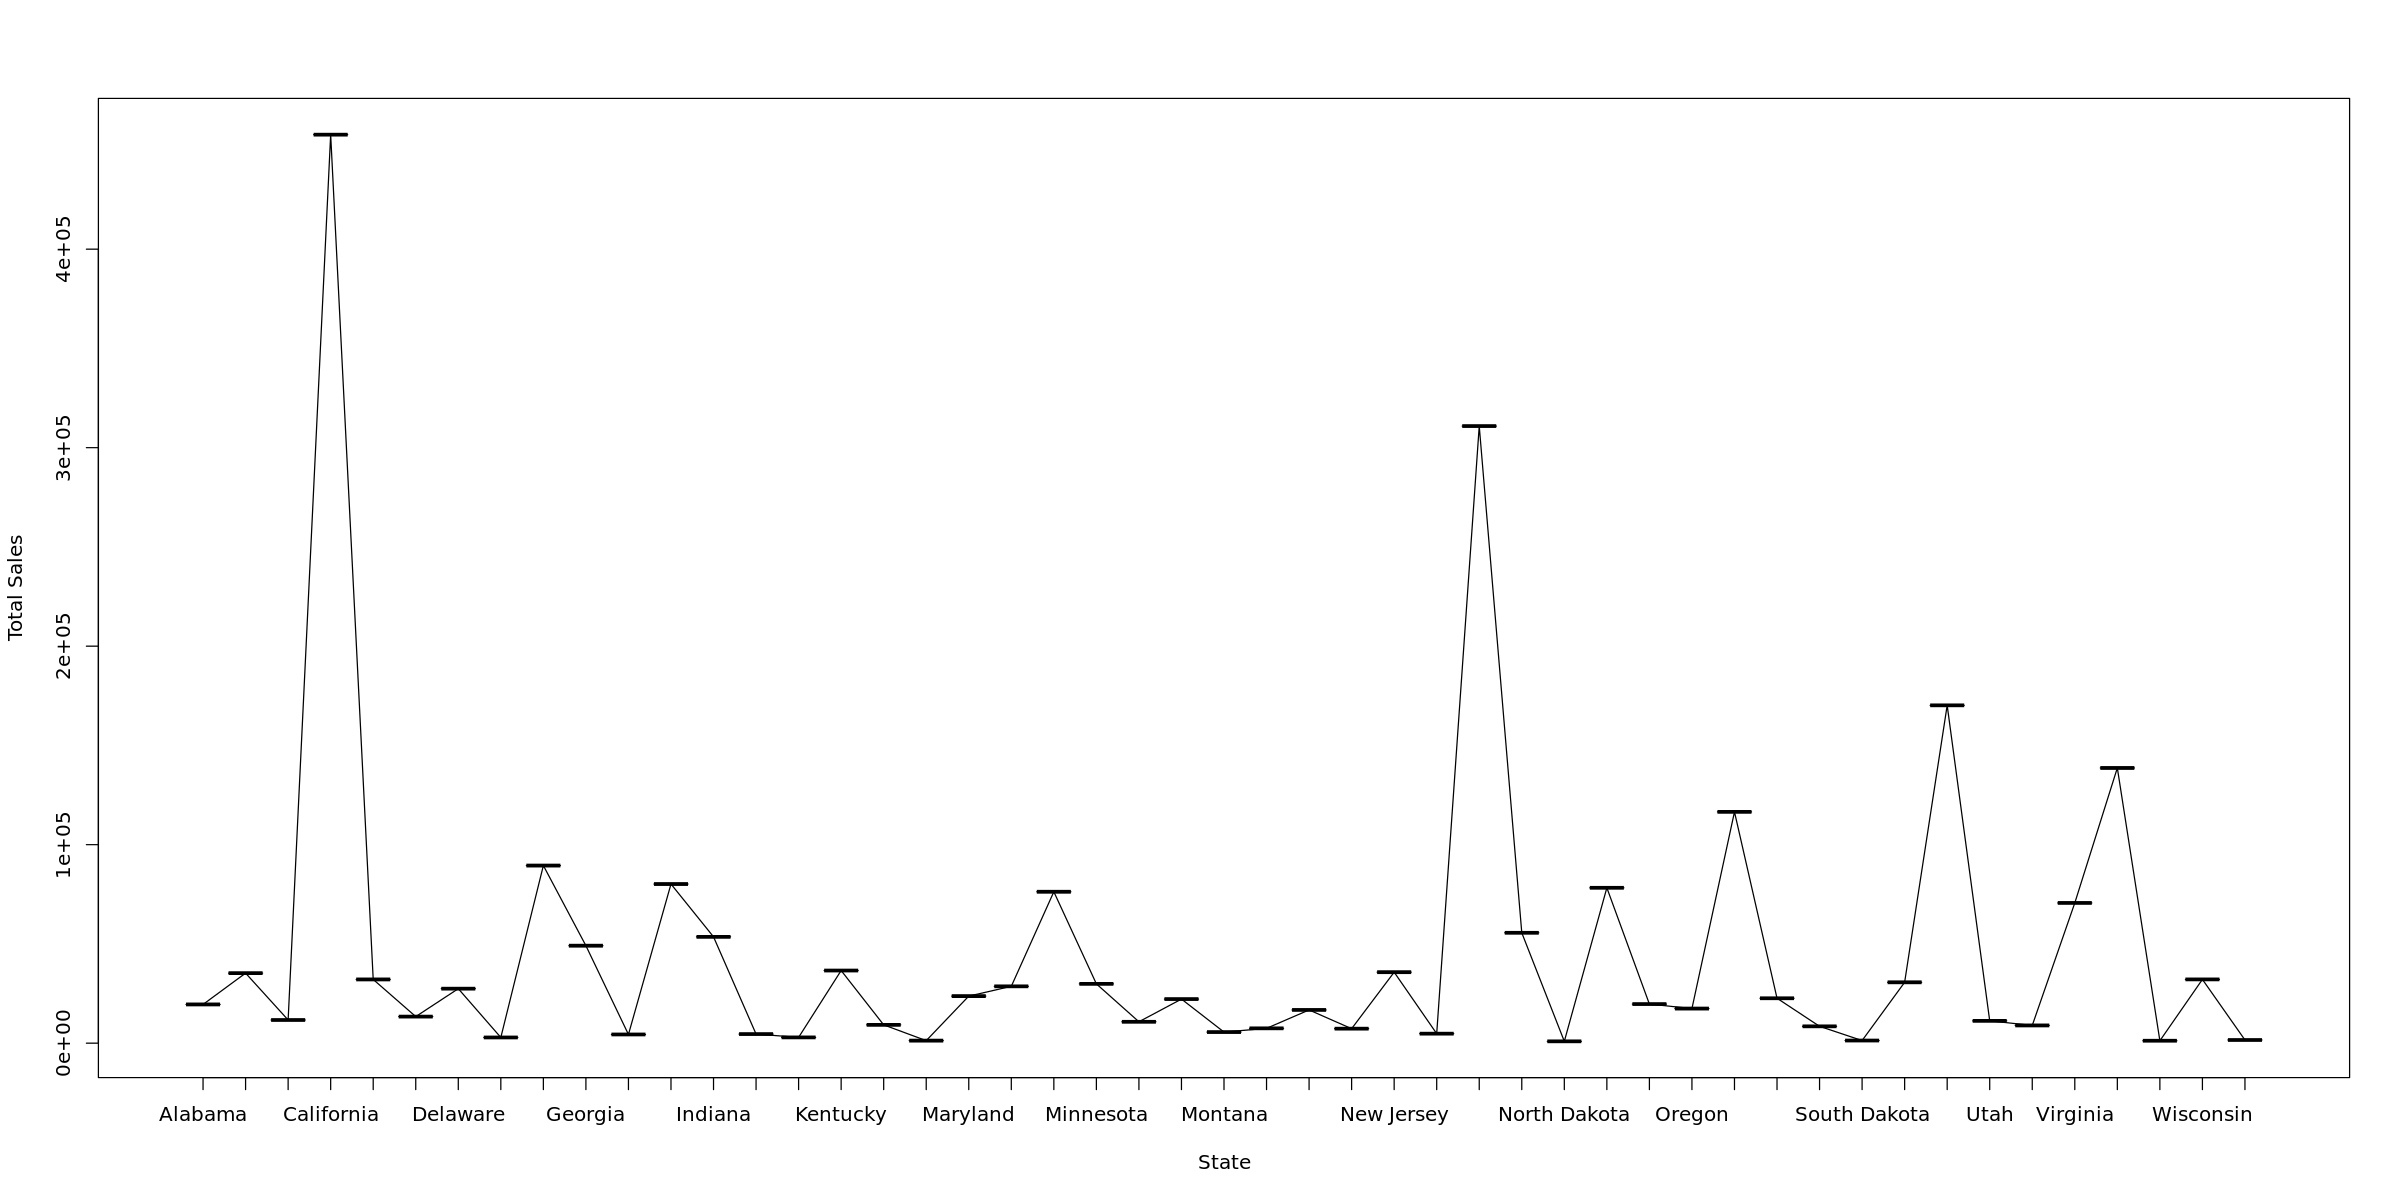

In [17]:
Q = select(store,State,Sales)%>%group_by(State)%>%summarise(Total.Sales = sum(Sales))
options(repr.plot.width = 20, repr.plot.height = 10)
plot(x=Q$State,y=Q$Total.Sales,,xlab='State',ylab='Total Sales')
lines(x=Q$State,y=Q$Total.Sales)

#### Find and plot total profit in each city

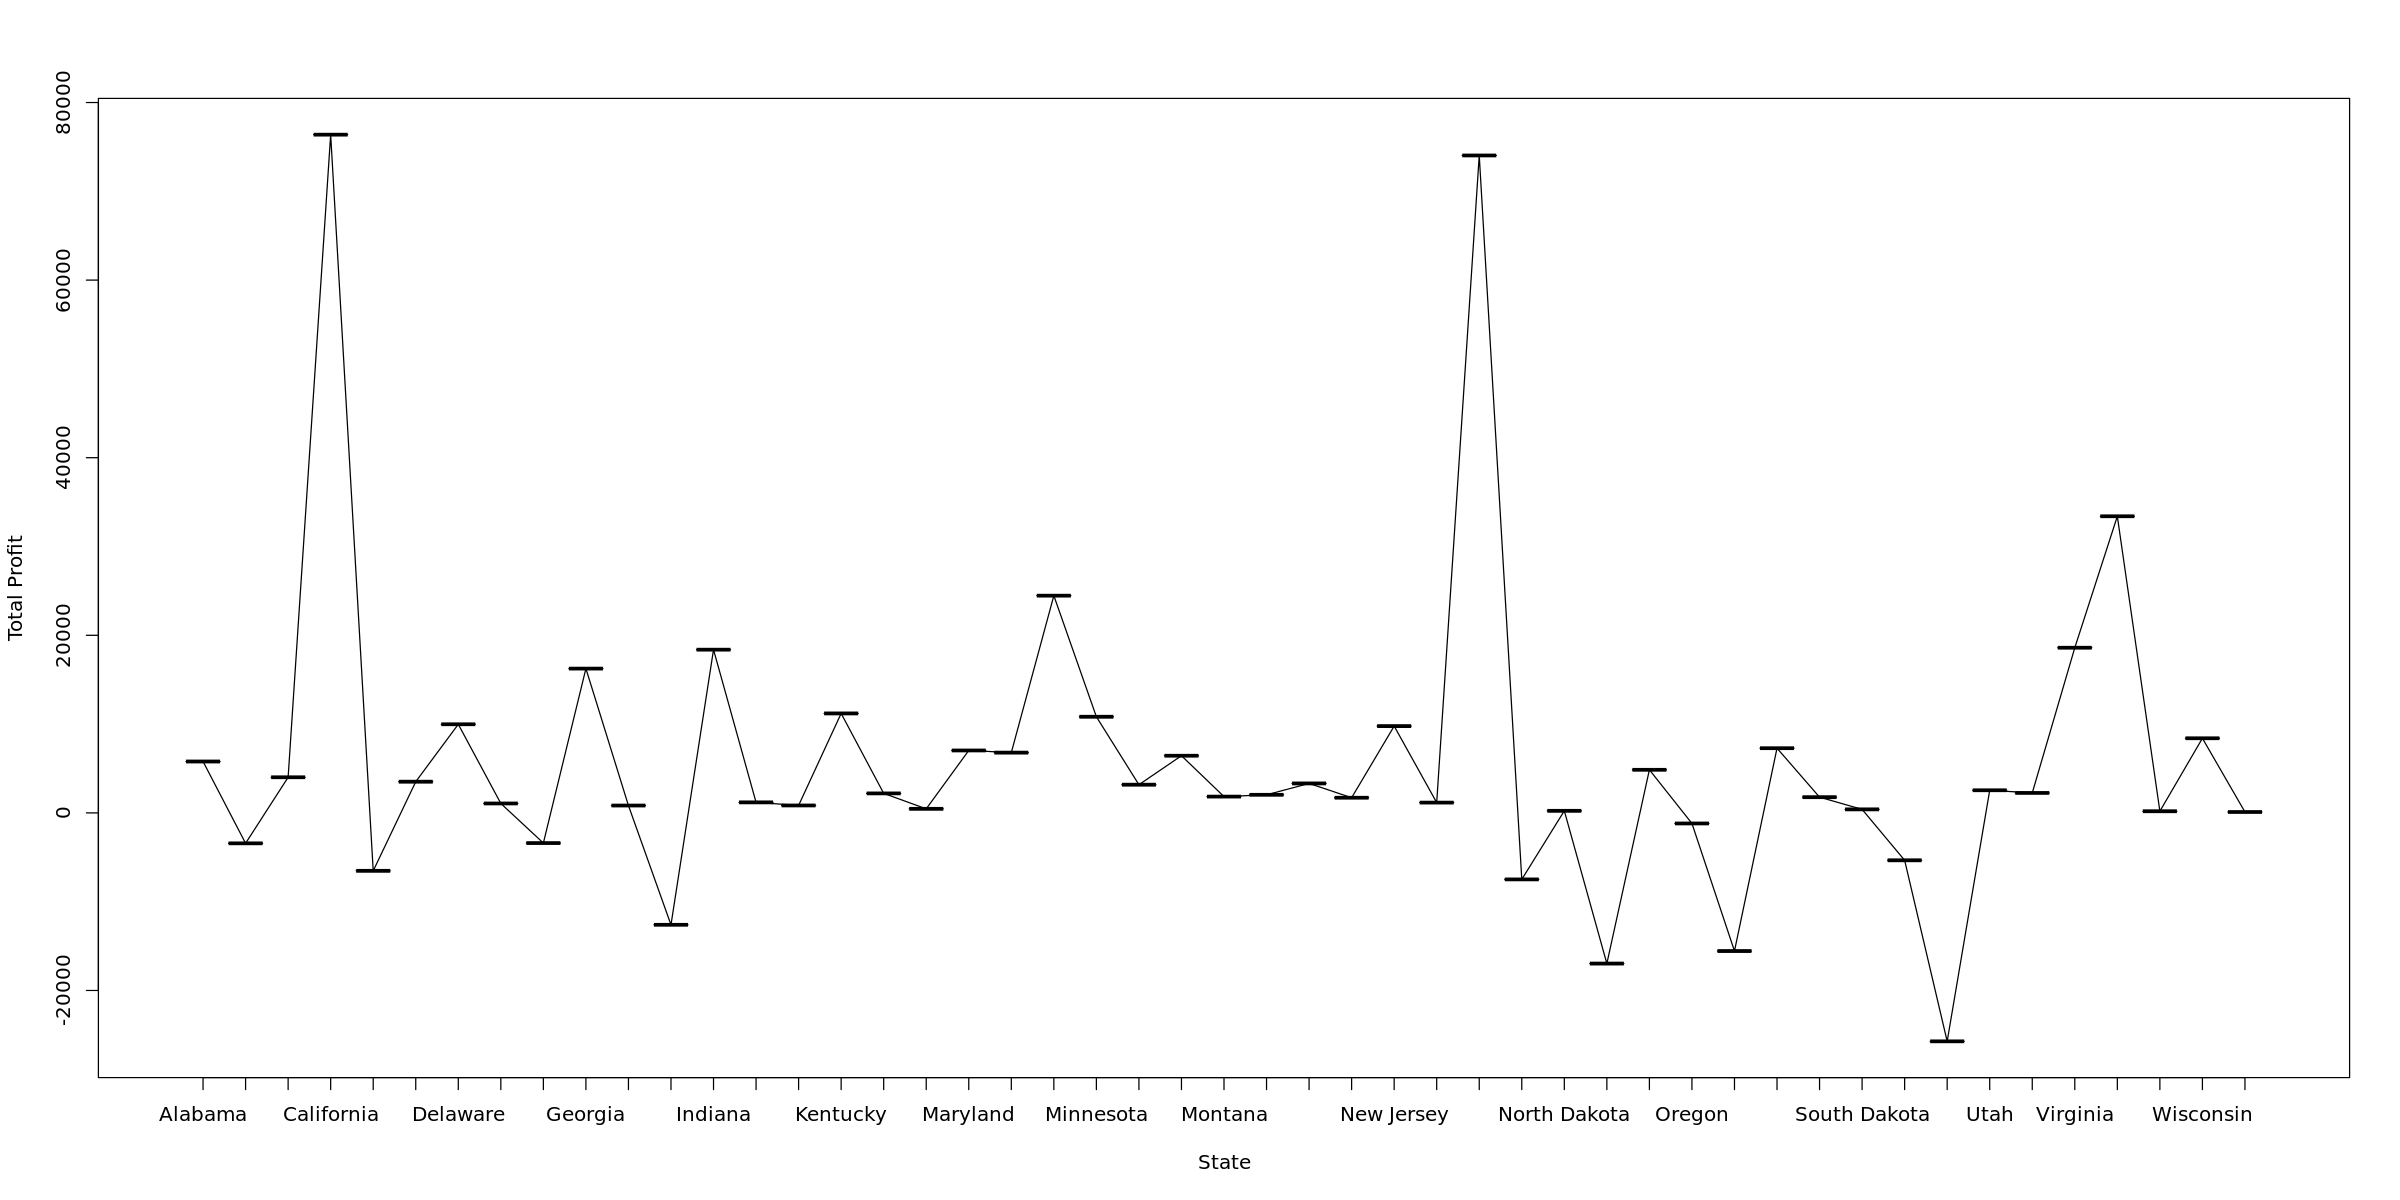

In [18]:
Q10 = select(store,State,Profit)%>%group_by(State)%>%summarise(Total.Profit = sum(Profit))
options(repr.plot.width = 20, repr.plot.height = 10)
plot(x=Q10$State,y=Q10$Total.Profit,xlab='State',ylab='Total Profit')
lines(x=Q10$State,y=Q10$Total.Profit)

#### Plot between Sales and profit and categories with respect to Ship.Mode

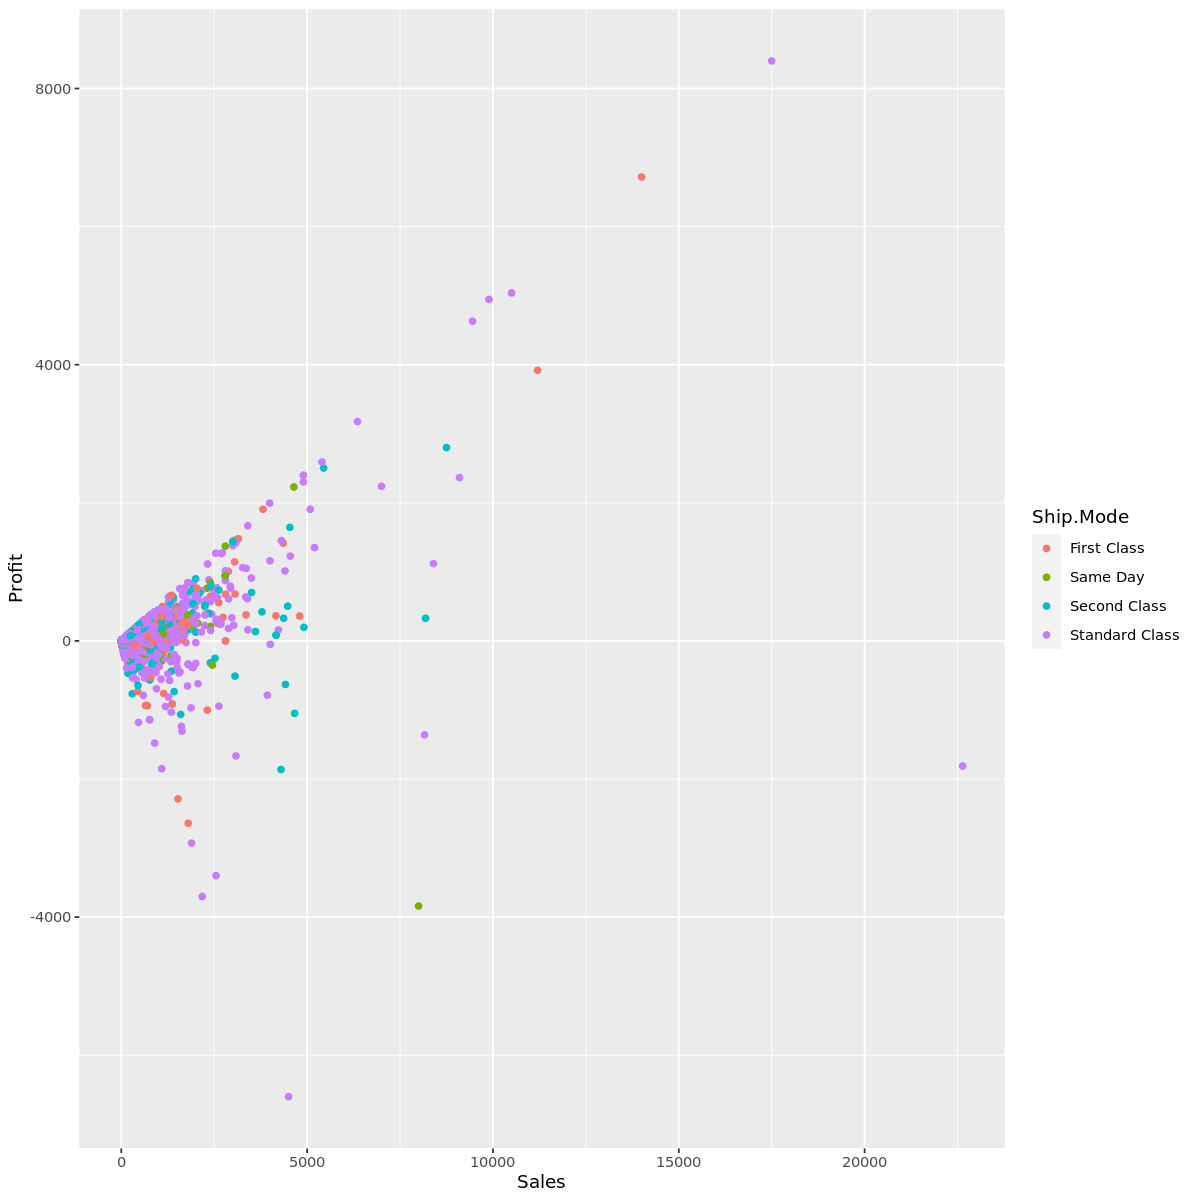

In [19]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = store, aes(x = Sales, y = Profit, color = Ship.Mode)) + geom_point()

#### Plot between Sales and profit and categories with respect to Category

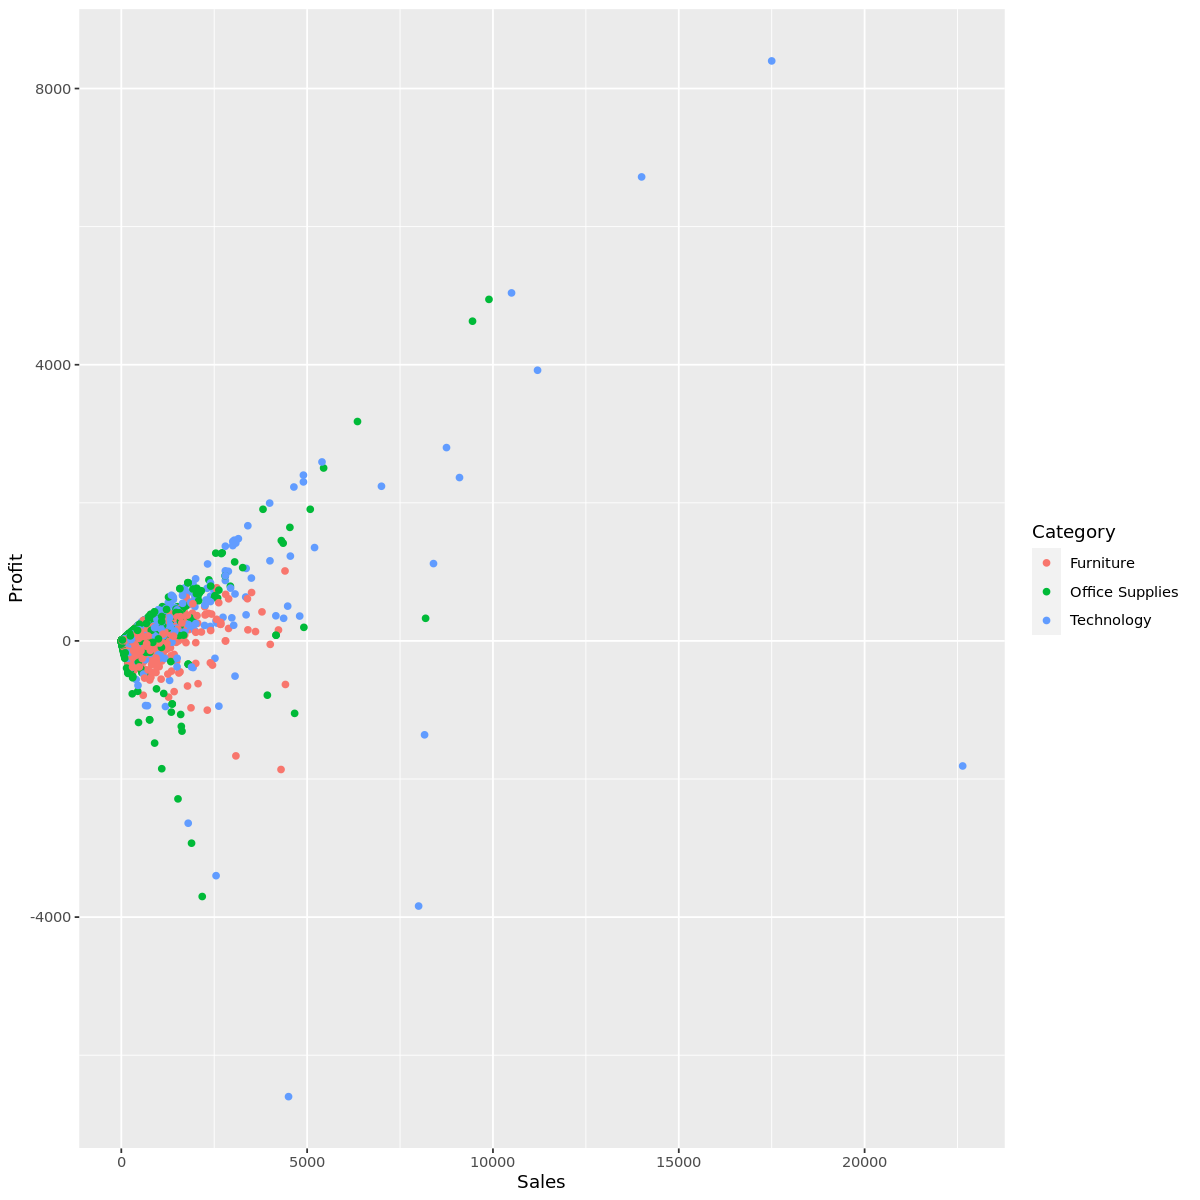

In [20]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = store, aes(x = Sales, y = Profit, color = Category)) + geom_point()

#### Plot between Discount and profit and categories with respect to Category

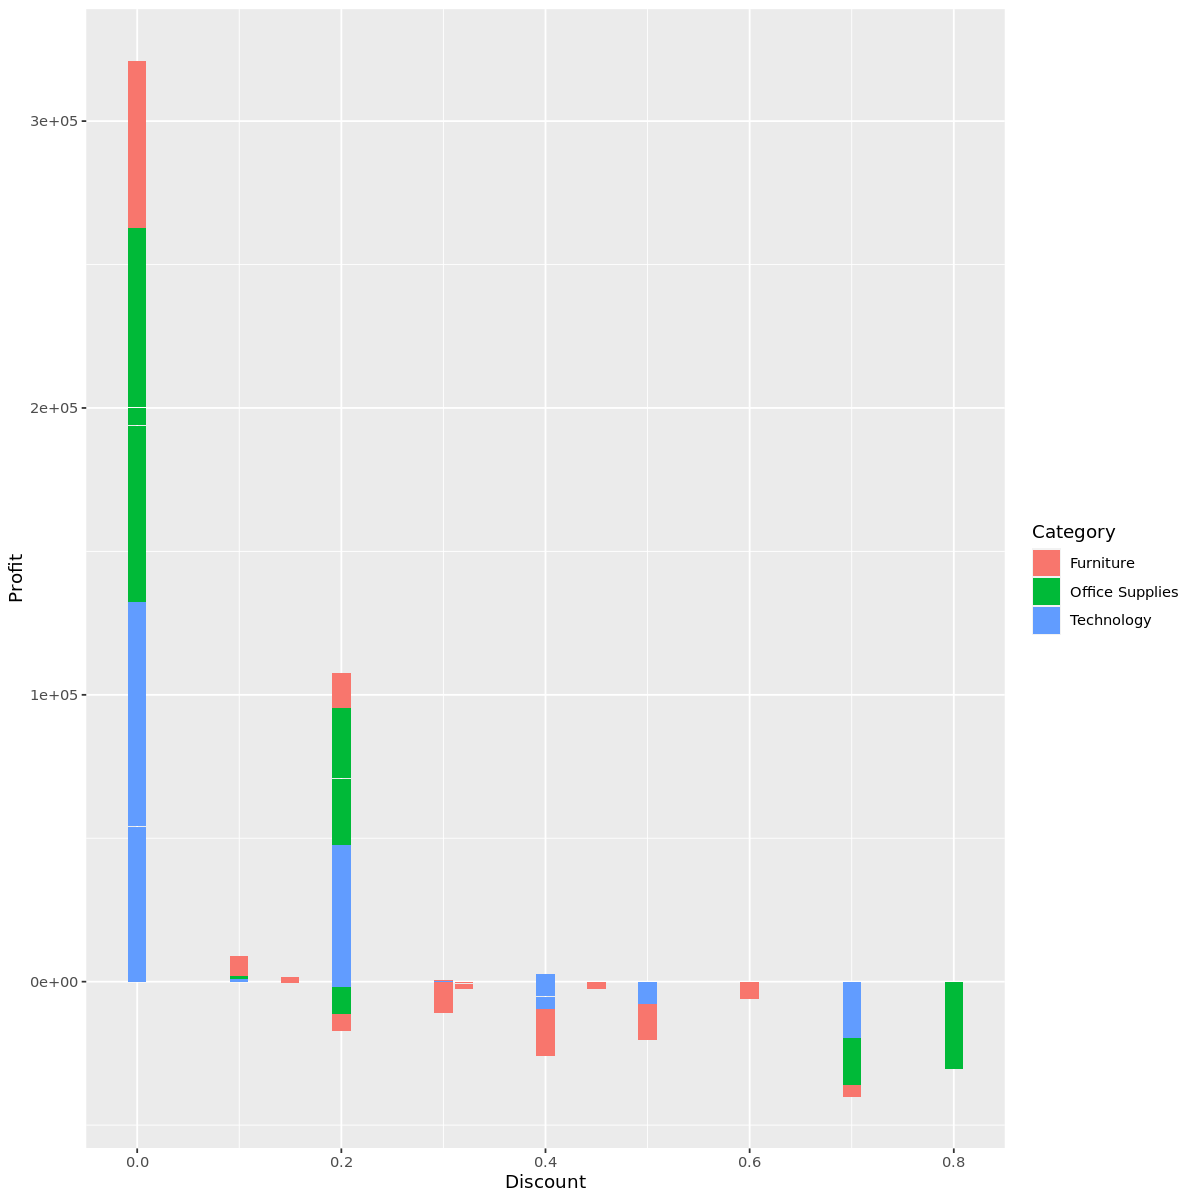

In [21]:
ggplot(data = store) + geom_bar(aes(x = Discount, y = Profit, fill = Category), stat = "identity")